Lab 1)  Question 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pandas as pd
from sklearn.model_selection import train_test_split

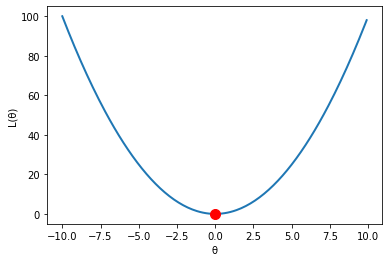

In [ ]:
def L(theta):
  return theta**2

theta = np.arange(-10, 10, 0.1)
func_L = L(theta)
plt.figure()
plt.plot(theta, func_L, linewidth=2)

min_func_L = min(func_L)
min_location = np.argwhere(func_L == min_func_L)
#print(min_location)
plt.plot(theta[min_location[0,0]], min_func_L, 'ro', markersize=10)
plt.xlabel('θ')
plt.ylabel('L(θ)')
plt.show()

% For reference: Why arange is more apt in this situation than linspace: https://stackoverflow.com/questions/62106028/what-is-the-difference-between-np-linspace-and-np-arange

% np.argwhere(condition) => find the array indices of array elements that satisfy the condition

Lab1) Question 2

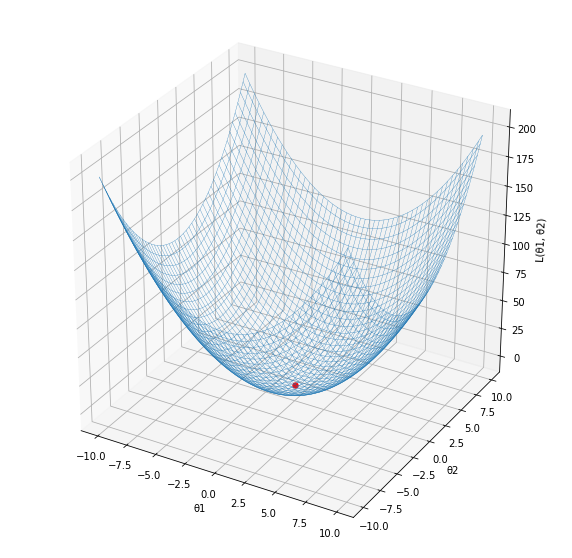

In [ ]:
def L(theta1, theta2):
    return theta1**2 + theta2**2

theta1 = np.arange(-10,10,0.1)
theta2 = np.arange(-10,10,0.1)

func_L = np.zeros((len(theta1),len(theta2)))
for i in range(len(theta1)):
    for j in range(len(theta2)):
        func_L[i][j] = L(theta1[i], theta2[j])

X, Y = np.meshgrid(theta1, theta2)
z = L(X, Y)
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, z, linewidth=0.3)


min_func_L = np.min(func_L)
#print(min_func_L)
min_loc = np.argwhere(func_L == min_func_L)
#print(z[100,100])
x_coord = min_loc[0,0]
y_coord = min_loc[0,1]
min_value = z[x_coord, y_coord]
#print(min_value)
ax.scatter(theta1[x_coord], theta2[y_coord], min_value, marker="o", c="red", s=28)
ax.set_xlabel('θ1')
ax.set_ylabel('θ2')
ax.set_zlabel('L(θ1, θ2)')
plt.show()


Lab 1) Question 3(a)

Minimum value of L(θ0, θ1) is 1572.6593617600001
θ0 and θ1 values for minimum value of L(θ0, θ1) are  49.19999999999982 -0.008599999999997388  respectively.


/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


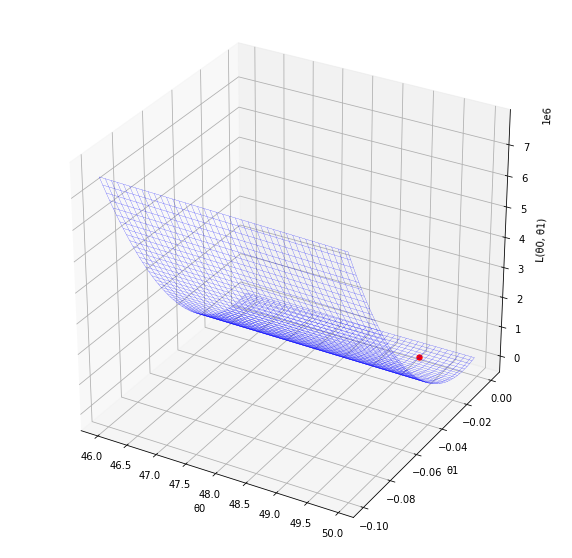

In [ ]:
def L(x, y, theta0, theta1):
    return np.sum(np.square(y - (theta0 + (theta1*x))))

theta0 = np.arange(46,50,0.05)
theta1 = np.arange(-0.1,0,0.0001)
L_theta0_theta1 = np.zeros((len(theta1),len(theta0)))
data = pd.read_excel('/content/sample_data/data_lab1.xlsx')
data_x = np.reshape(np.array(data.x), (-1, 1))
# print(data_x)
# print(np.array(data.x))
data_y = np.reshape(np.array(data.y), (-1, 1))

for i in range(len(theta1)):
    for j in range(len(theta0)):
        L_theta0_theta1[i][j] = L(data_x, data_y, theta0[j], theta1[i])

min_L_theta0_theta1 = np.min(L_theta0_theta1)
print('Minimum value of L(θ0, θ1) is', min_L_theta0_theta1)

min_loc = np.argwhere(L_theta0_theta1 == min_L_theta0_theta1)
print('θ0 and θ1 values for minimum value of L(θ0, θ1) are ', theta0[min_loc[0,1]], theta1[min_loc[0,0]], ' respectively.')

x, y = np.meshgrid(theta0, theta1)
z = L_theta0_theta1

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.plot_wireframe(x, y, z, color='blue', linewidth=0.2)
ax.scatter(theta0[min_loc[0,1]], theta1[min_loc[0,0]], z[min_loc[0,0],min_loc[0,1]], marker="o", c="red", s=28)
ax.set_xlabel('θ0')
ax.set_ylabel('θ1')
ax.set_zlabel('L(θ0, θ1)')
plt.show()

% For reference: read excel with pandas https://pythonbasics.org/read-excel/

Question 3(b)

In [ ]:
temp = np.copy(data_x)
x = np.ones((np.size(temp,0),2))
x[:,1] = temp[:,0]

print('determinant of x.T*x = ',np.linalg.det(np.matmul(x.T,x)))

theta = np.matmul(np.linalg.inv(np.matmul(x.T,x)),np.matmul(x.T,data_y))
print('For minima, theta0 = ',theta[0,0],' and theta1 = ',theta[1,0])

determinant of x.T*x =  5618077959.999997
For minima, theta0 =  49.23762989433493  and theta1 =  -0.008611934783475328


Question 4

In [ ]:
LS = np.sum(np.square(data_y - (theta[0,0] + (theta[1,0]*temp))))
print('Value of L using theta values from LS method(Pseudo Inverse) = ',LS)
print()
for i in range(10):
    L_other_value = np.sum(np.square(data_y - (np.random.randint(theta0.shape[0]) - (np.random.randint(theta1.shape[0])*temp))))
    print('Value of L for some other theta = ',L_other_value)

Value of L using theta values from LS method(Pseudo Inverse) =  1572.6503668922921

Value of L for some other theta =  2484947822720726.0
Value of L for some other theta =  269611008855161.75
Value of L for some other theta =  1140041054488897.8
Value of L for some other theta =  259697580389616.75
Value of L for some other theta =  1422578963889964.8
Value of L for some other theta =  12106098743706.75
Value of L for some other theta =  1385272296102789.8
Value of L for some other theta =  2036913111196393.8
Value of L for some other theta =  2838967870749331.0
Value of L for some other theta =  1151197388894299.8


Question 5

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

x = np.array([
        [1, 2],
        [2, 4],
        [3, 6], 
        [4, 8]
    ])
y = np.array([
        [2],
        [3],
        [4],
        [5]
    ])

reg = LinearRegression().fit(x,y)
print('Score: ', reg.score(x, y))
print('Coefficient: ', reg.coef_)
print('Intercept: ', reg.intercept_)

Score:  1.0
Coefficient:  [[0.2 0.4]]
Intercept:  [1.]


In [ ]:
# Question 5 (b)

Question 6

Part A

In [ ]:
real_estate_data = pd.read_excel('/content/sample_data/real_estate_valuation_dataset.xlsx')
#real_estate_data

In [ ]:
x1 = np.reshape(np.array(real_estate_data['X1 transaction date']), (-1, 1))
x2 = np.reshape(np.array(real_estate_data['X2 house age']), (-1, 1))
x3 = np.reshape(np.array(real_estate_data['X3 distance to the nearest MRT station']), (-1, 1))
x4 = np.reshape(np.array(real_estate_data['X4 number of convenience stores']), (-1, 1))
x5 = np.reshape(np.array(real_estate_data['X5 latitude']), (-1, 1))
x6 = np.reshape(np.array(real_estate_data['X6 longitude']), (-1, 1))
X = np.hstack((x1, x2, x3, x4, x5, x6))
y = np.reshape(np.array(real_estate_data['Y house price of unit area']), (-1, 1))

In [ ]:
reg = LinearRegression().fit(X, y)
print('Score: ', reg.score(X, y))
print('Coefficient: ', reg.coef_)
print('Intercept: ', reg.intercept_)

y_pred1 = reg.predict(X)

print('RMSE ->', np.sqrt(mean_squared_error(y, y_pred1)))

Score:  0.5823850447850936
Coefficient:  [[ 5.14901721e+00 -2.69696735e-01 -4.48750825e-03  1.13332498e+00
   2.25470143e+02 -1.24290612e+01]]
Intercept:  [-14441.98271918]
RMSE -> 8.78231297536097


Part C

In [ ]:
# (c) Standardise the dataset 
X_norm = (X - X.min())/(X.max()-X.min())
reg = LinearRegression().fit(X_norm, y)
print('Score: ', reg.score(X_norm, y))
print('Coefficient: ', reg.coef_)
print('Intercept: ', reg.intercept_)

y_pred2 = reg.predict(X_norm)

print('RMSE ->', np.sqrt(mean_squared_error(y, y_pred2)))

Score:  0.5823850447850916
Coefficient:  [[ 3.34069318e+04 -1.74979808e+03 -2.91150478e+01  7.35303628e+03
   1.46285502e+06 -8.06400099e+04]]
Intercept:  [-14441.98271918]
RMSE -> 8.78231297536099


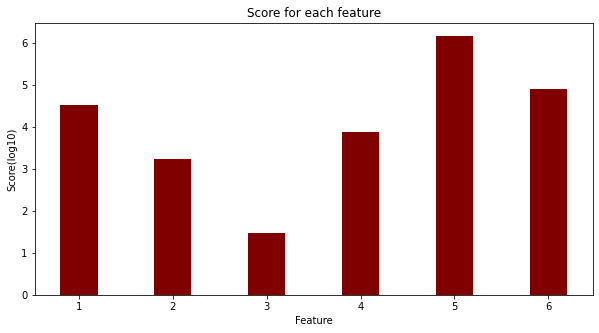

In [ ]:
fig = plt.figure(figsize = (10, 5))
 
# creating bar graph
plt.bar([1,2,3,4,5,6], np.log10(abs(reg.coef_[0])), color ='maroon',
        width = 0.4)
 
plt.xlabel("Feature")
plt.ylabel("Score(log10)")
plt.title("Score for each feature")
plt.show()

Part D

In [ ]:
# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Y_pred = reg.predict(y_test);
plt.hist((y_test-Y_pred))
# # Instantiate the linear model and visualizer
# model = LinearRegression()
# visualizer = ResidualsPlot(model)

# visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
# visualizer.score(X_test, y_test)  # Evaluate the model on the test data
# visualizer.show()                 # Finalize and render the figure
plt.show()

ValueError: ignored

Part E

In [ ]:
X = np.hstack((x1, x2, x3, x4, x5))
y = np.reshape(np.array(real_estate_data['Y house price of unit area']), (-1, 1))

reg = LinearRegression().fit(X, y)
print('Score: ', reg.score(X, y))
print('Coefficient: ', reg.coef_)
print('Intercept: ', reg.intercept_)

y_pred1 = reg.predict(X)

print('RMSE ->', np.sqrt(mean_squared_error(y, y_pred1)))

Score:  0.5823178829759132
Coefficient:  [[ 5.13755503e+00 -2.69380517e-01 -4.35333829e-03  1.13619277e+00
   2.26879404e+02]]
Intercept:  [-15964.80386271]
RMSE -> 8.783019142977878
